<a href="https://colab.research.google.com/github/Jaelibj/JaeliJaussi/blob/main/notebooks/starter_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [15]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Convert date
df['dteday'] = pd.to_datetime(df['dteday'])

# Create total rentals (target variable)
df['total'] = df['casual'] + df['registered']

# Drop columns we won't use
df = df.drop(columns=['casual', 'registered'])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Features and target
X = df.drop(columns=['dteday', 'total'])
y = df['total']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Learning Rate Experiment

In [16]:
def build_model(lr):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='MSE',
        metrics=['MAE']
    )

    return model

learning_rates = [0.1, 0.01, 0.001, 0.0001]
history_dict = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    model = build_model(lr)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=0
    )

    history_dict[lr] = history.history['val_loss']


Training with learning rate: 0.1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with learning rate: 0.01

Training with learning rate: 0.001

Training with learning rate: 0.0001


## Plotting Results

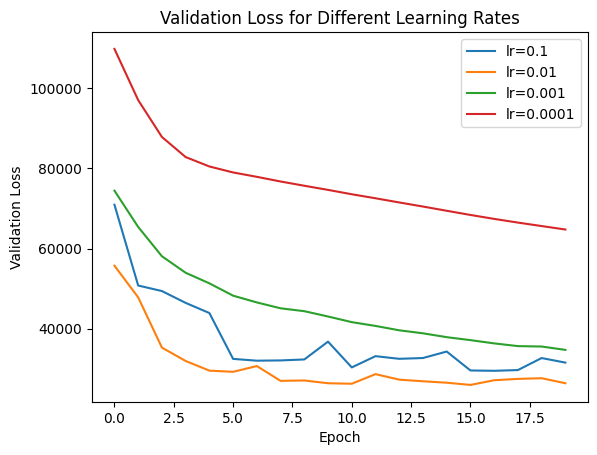

In [17]:
for lr in learning_rates:
    plt.plot(history_dict[lr], label=f"lr={lr}")

plt.title("Validation Loss for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

## Step-by-Step Approach
1. Select a range of learning rates to test (e.g., 0.1, 0.01, 0.001, 0.0001).

2. Train the neural network using each learning rate.

3. Monitor training and validation loss for each model.

4. Compare how quickly and smoothly each model converges.

5. Select the learning rate that achieves the lowest validation loss without instability.

6. Optionally, apply a learning rate scheduler to adjust the rate during training.

### Conclusion: Trial and Error!!

In [18]:
# Learning Rate Adjustment
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# When Should Bikes Be Pulled for Cleaning?

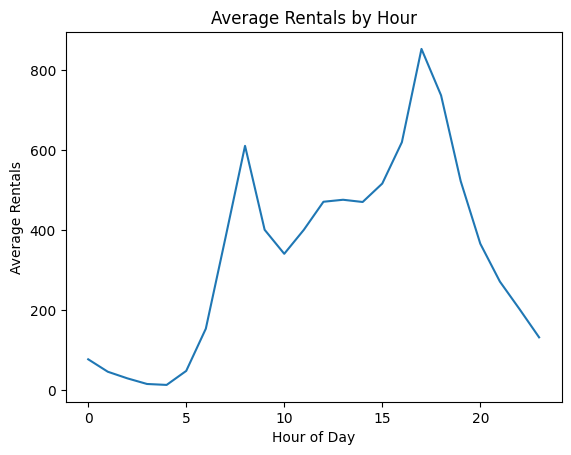

In [27]:
# Rentals by Hour
hourly = df.groupby('hr')['total'].mean()

plt.plot(hourly.index, hourly.values)
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()

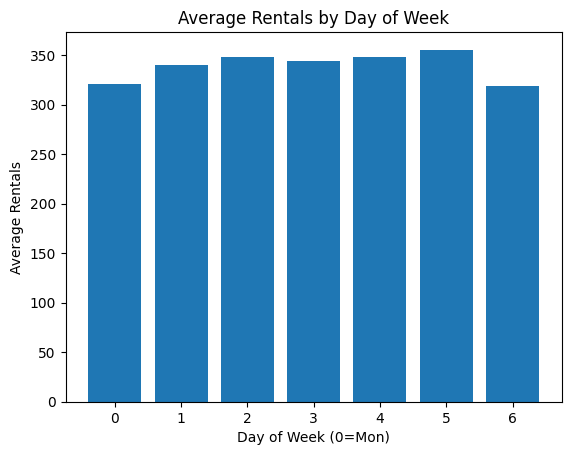

In [21]:
# Rentals by Day of Week
df['day_of_week'] = df['dteday'].dt.dayofweek  # 0 = Monday

daily = df.groupby('day_of_week')['total'].mean()

plt.bar(daily.index, daily.values)
plt.title("Average Rentals by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Rentals")
plt.show()

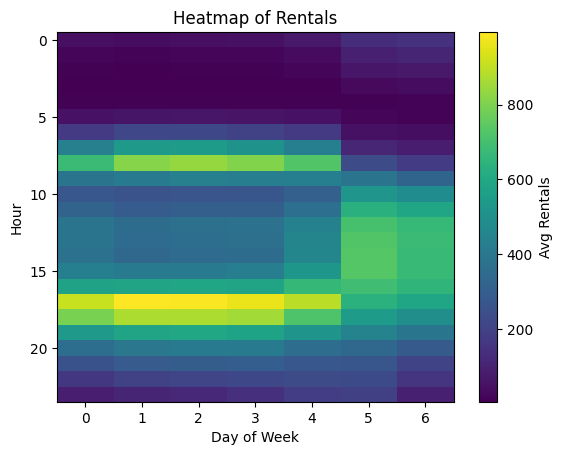

In [22]:
# Rentals by Hour and Day of Week
pivot = df.pivot_table(values='total', index='hr', columns='day_of_week', aggfunc='mean')

plt.imshow(pivot, aspect='auto')
plt.colorbar(label="Avg Rentals")
plt.xlabel("Day of Week")
plt.ylabel("Hour")
plt.title("Heatmap of Rentals")
plt.show()

# Forecasting: Are We Recovering? (From Covid)

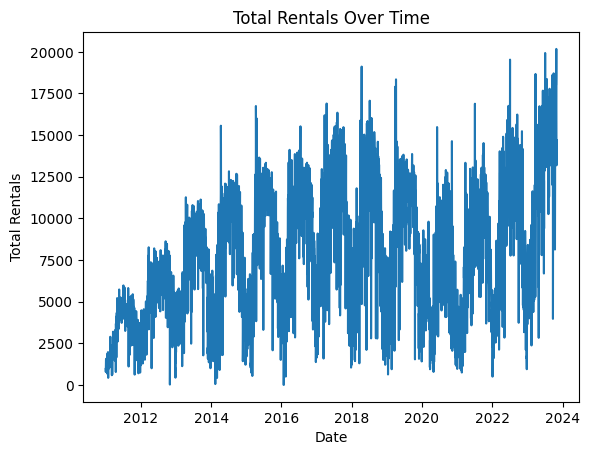

In [23]:
# Daily Rentals Over Time
daily_totals = df.groupby('dteday')['total'].sum()

plt.plot(daily_totals.index, daily_totals.values)
plt.title("Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

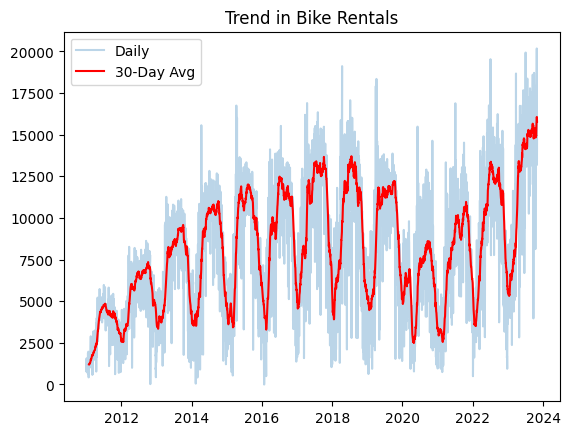

In [28]:
# Daily Average Trend
rolling = daily_totals.rolling(window=30).mean()

plt.plot(daily_totals.index, daily_totals.values, alpha=0.3, label="Daily")
plt.plot(rolling.index, rolling.values, color='red', label="30-Day Avg")
plt.legend()
plt.title("Trend in Bike Rentals")
plt.show()

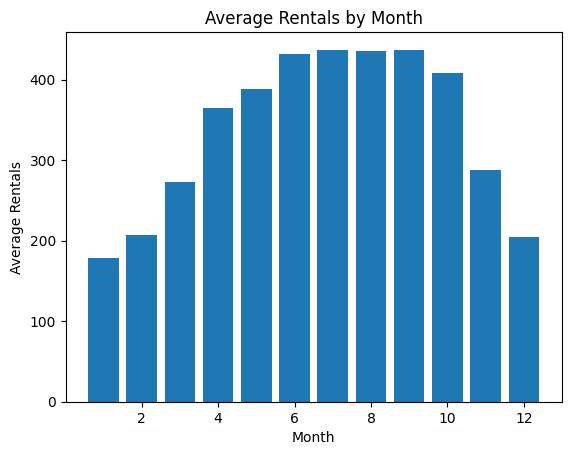

In [25]:
# Monthly Comparison
df['month'] = df['dteday'].dt.month
monthly = df.groupby('month')['total'].mean()

plt.bar(monthly.index, monthly.values)
plt.title("Average Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2812/2812 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - MAE: 254.5389 - loss: 125398.0156
Epoch 2/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - MAE: 203.2991 - loss: 77115.0781
Epoch 3/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - MAE: 192.3970 - loss: 71240.4062
Epoch 4/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - MAE: 180.8718 - loss: 65474.6758
Epoch 5/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - MAE: 172.0561 - loss: 60646.1016
Epoch 6/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - MAE: 164.7715 - loss: 55966.2148
Epoch 7/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - MAE: 159.3685 - loss: 53419.8359
Epoch 8/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - MAE: 153.1117 - loss: 50511.8125
Epoch 9/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - MAE: 147.4892 - loss: 47994.7031
Epoch 10/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - MAE: 144.4160 - loss: 46668.7500
Epoch 11/30
2812/2812 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - MAE: 142.0087 - loss: 46009.5547
Epoch 12/30
2812/2812 ━━━━━━

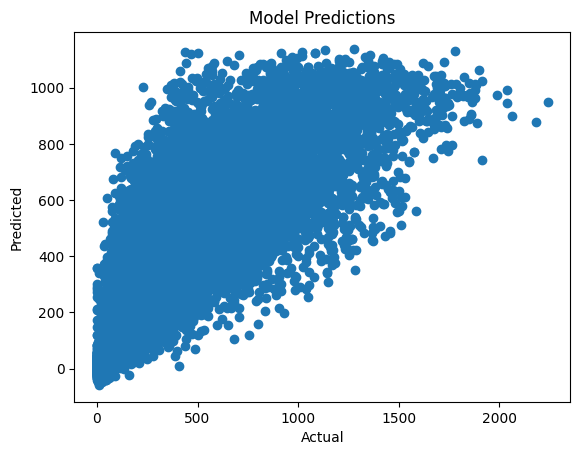

In [26]:
# Predicting the Future (Trial Code)
model = build_model(0.001)

model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

predictions = model.predict(X_val)

plt.scatter(y_val, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model Predictions")
plt.show()